In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
df = pd.read_csv(r'D:\Data Analytics\iNeuron\Computer Vision\Datasets\Unzipped\healthcare_dataset\healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
df[df.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [8]:
df.shape

(55500, 15)

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(54966, 15)

In [11]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [12]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [13]:
df['Doctor'].unique()

array(['Matthew Smith', 'Samantha Davies', 'Tiffany Mitchell', ...,
       'Deborah Sutton', 'Mary Bartlett', 'Alec May'], dtype=object)

In [14]:
df['Hospital'].unique()

array(['Sons and Miller', 'Kim Inc', 'Cook PLC', ...,
       'Guzman Jones and Graves,', 'and Williams, Brown Mckenzie',
       'Moreno Murphy, Griffith and'], dtype=object)

In [15]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [16]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [17]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [19]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [20]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [21]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 5 numerical features: ['Age', 'Date of Admission', 'Billing Amount', 'Room Number', 'Discharge Date']
We have 10 categorical features: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


<Axes: >

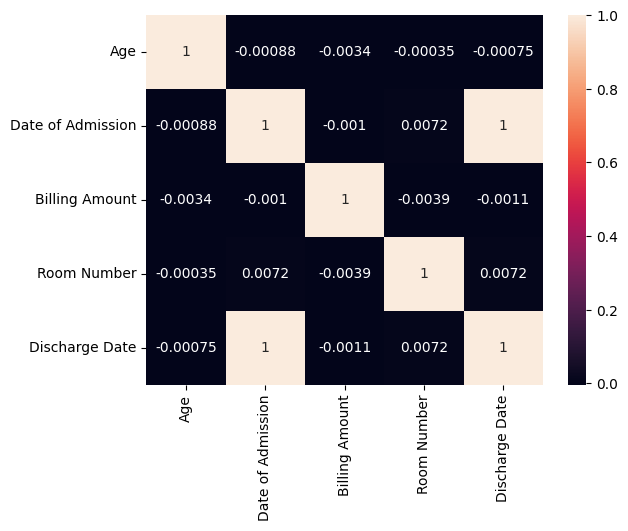

In [23]:
import seaborn as sns
sns.heatmap(df[numeric_features].corr(), annot = True)

Age, Billing Amount,Date of Admission, Discharge Date, Room Number are negatively related. Even though we remove these from the data, there will be no change in to the model.

C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_56392\3555875959.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_56392\3555875959.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_56392\3555875959.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_56392\3555875959.py:5: FutureWarning: 

`s

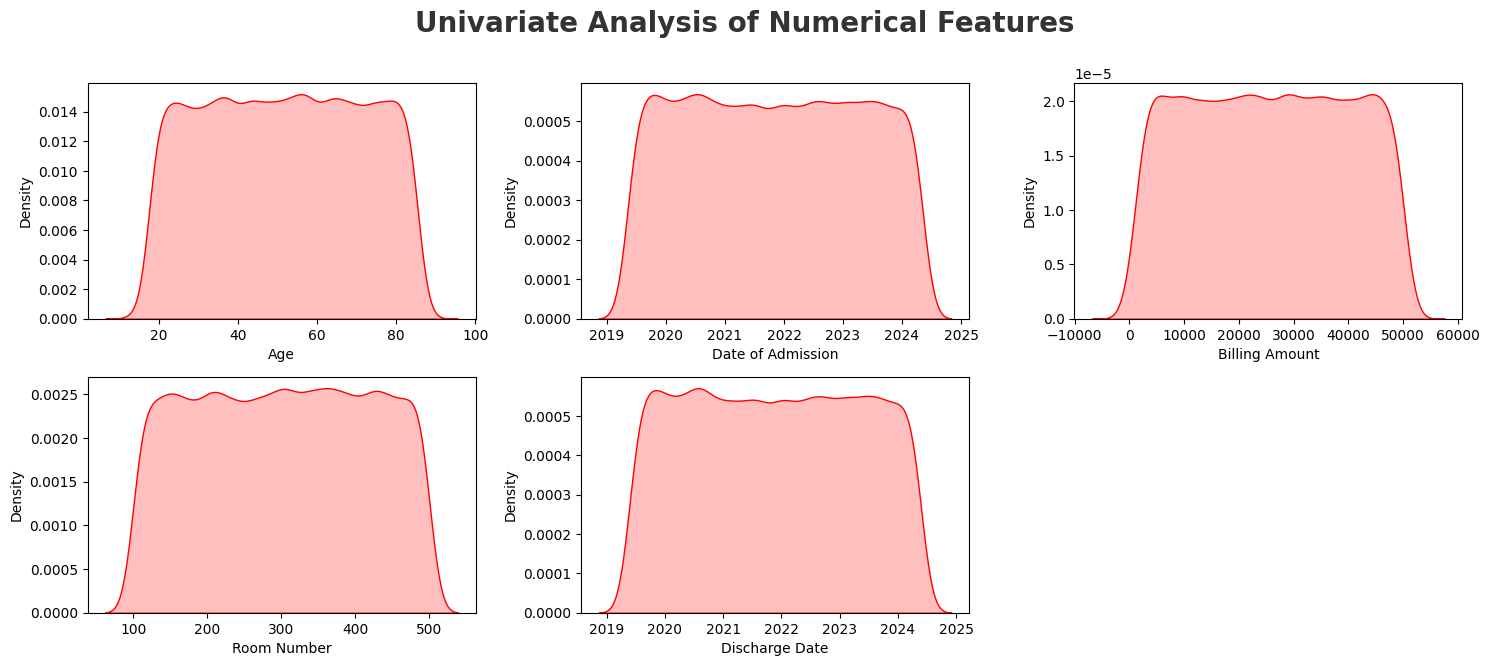

In [24]:
plt.figure(figsize = (15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
for i in range(0,len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: ylabel='count'>

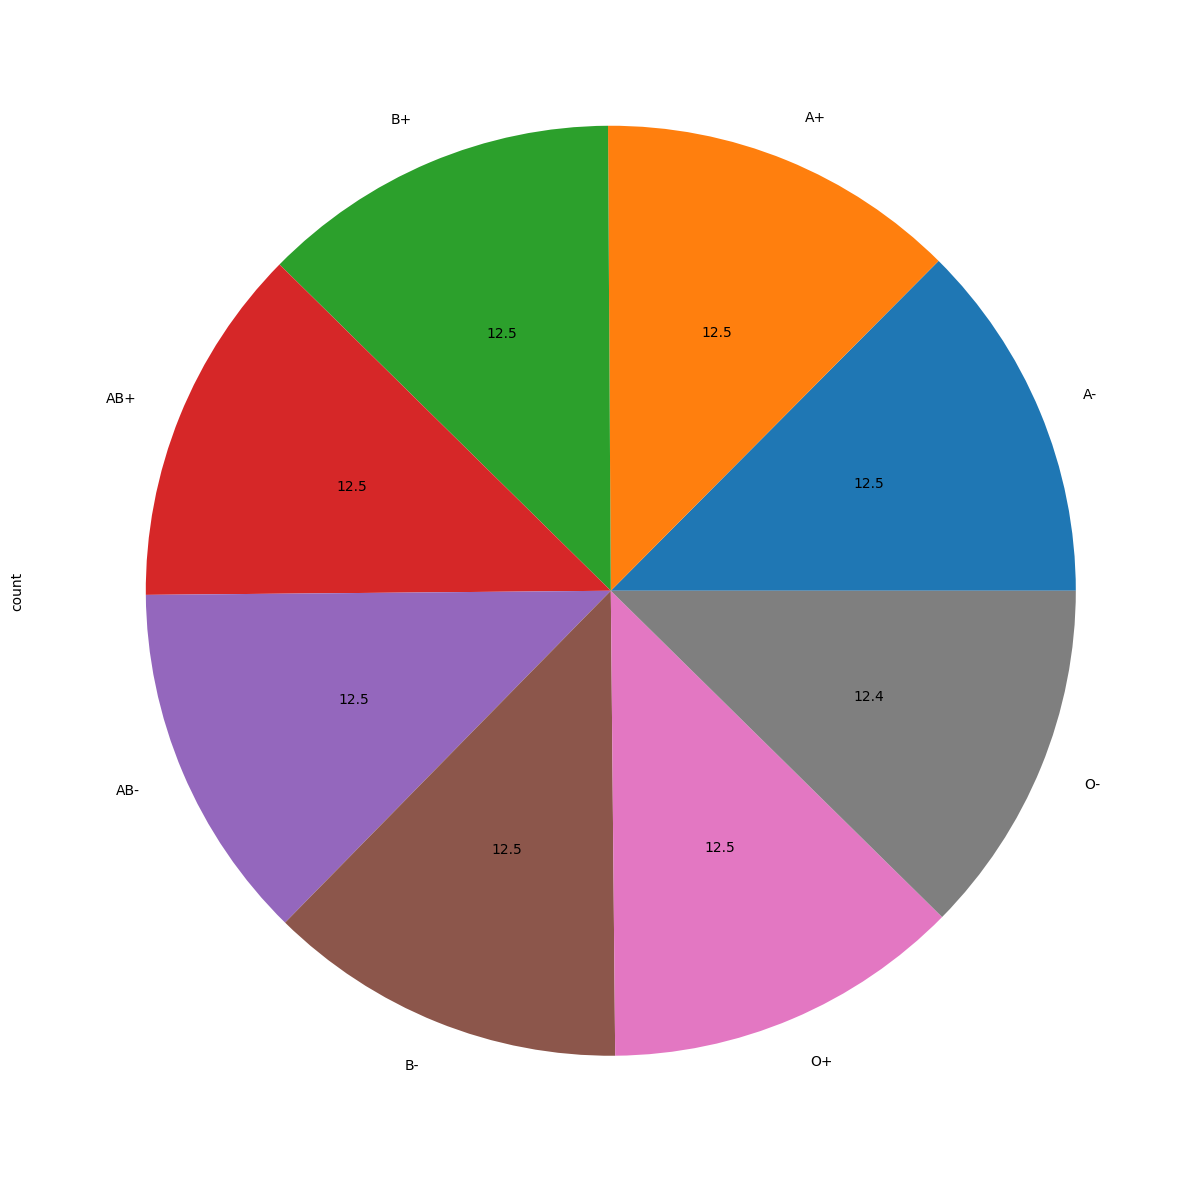

In [25]:
df['Blood Type'].value_counts().plot.pie(y = df['Blood Type'],figsize = (15,16), autopct = '%1.1f')

<Axes: ylabel='count'>

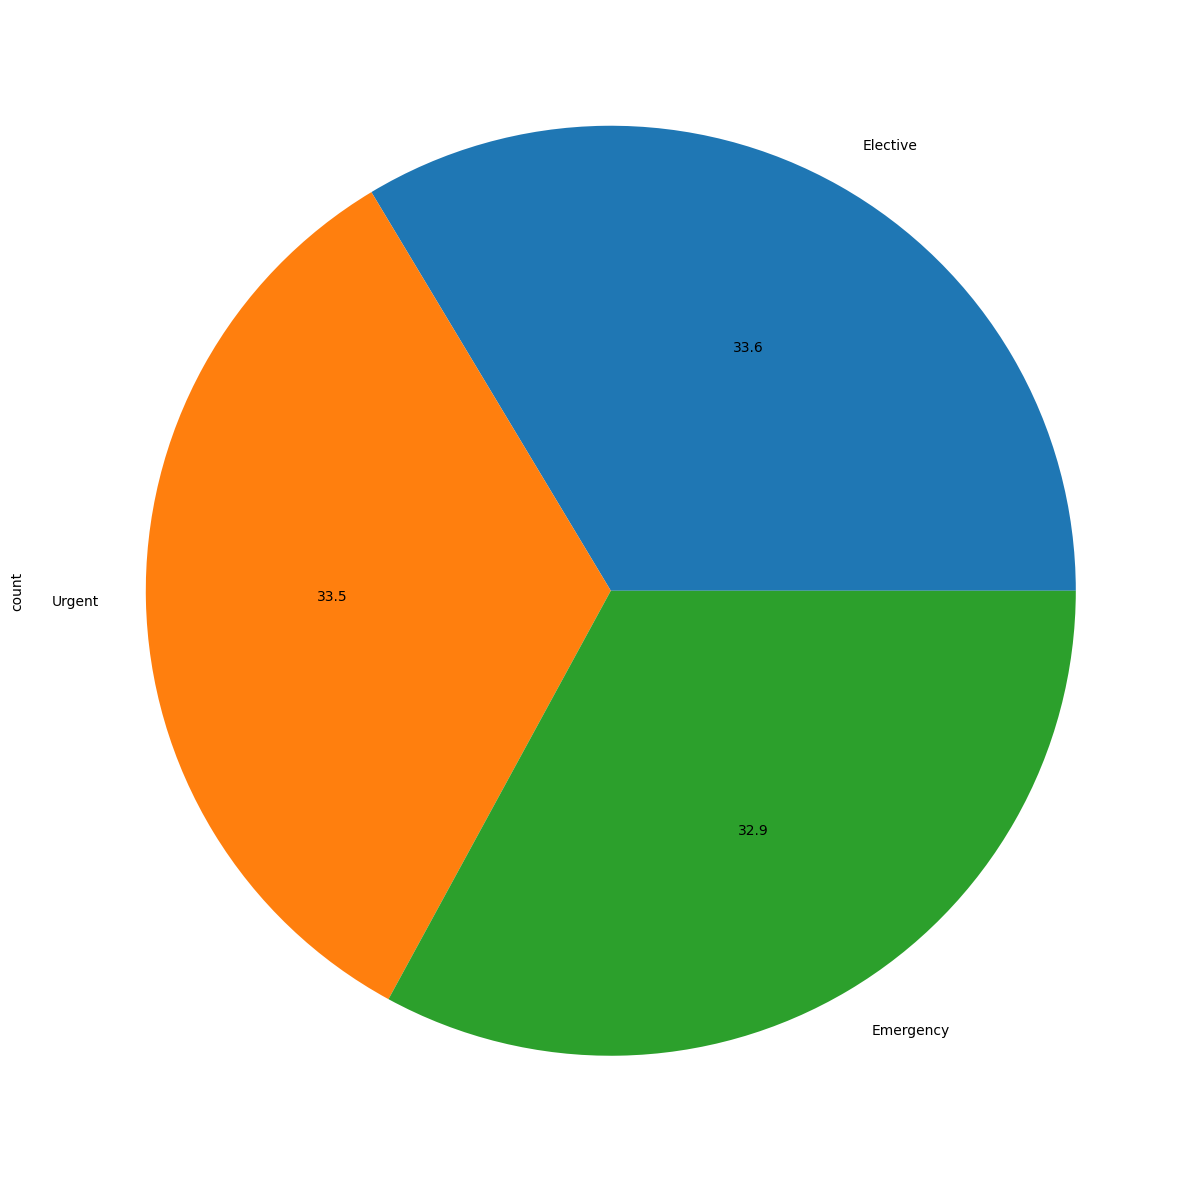

In [26]:
df['Admission Type'].value_counts().plot.pie(y = df['Admission Type'],figsize = (15,16), autopct = '%1.1f')

<Axes: ylabel='count'>

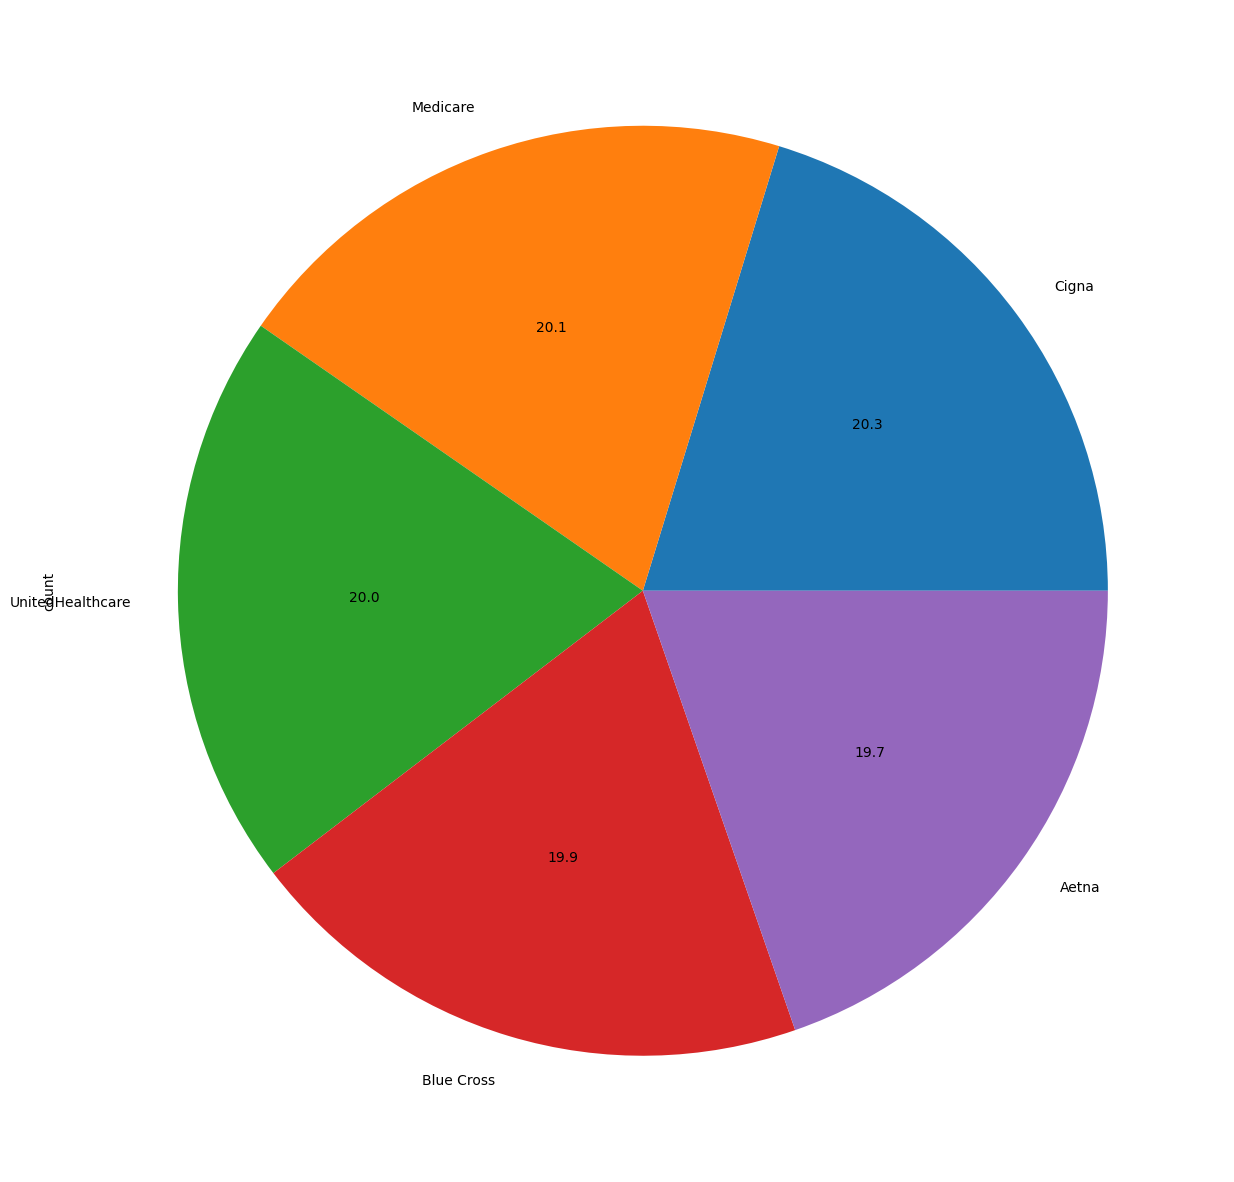

In [27]:
df['Insurance Provider'].value_counts().plot.pie(y = df['Insurance Provider'],figsize = (15,16), autopct = '%1.1f')

<Axes: ylabel='count'>

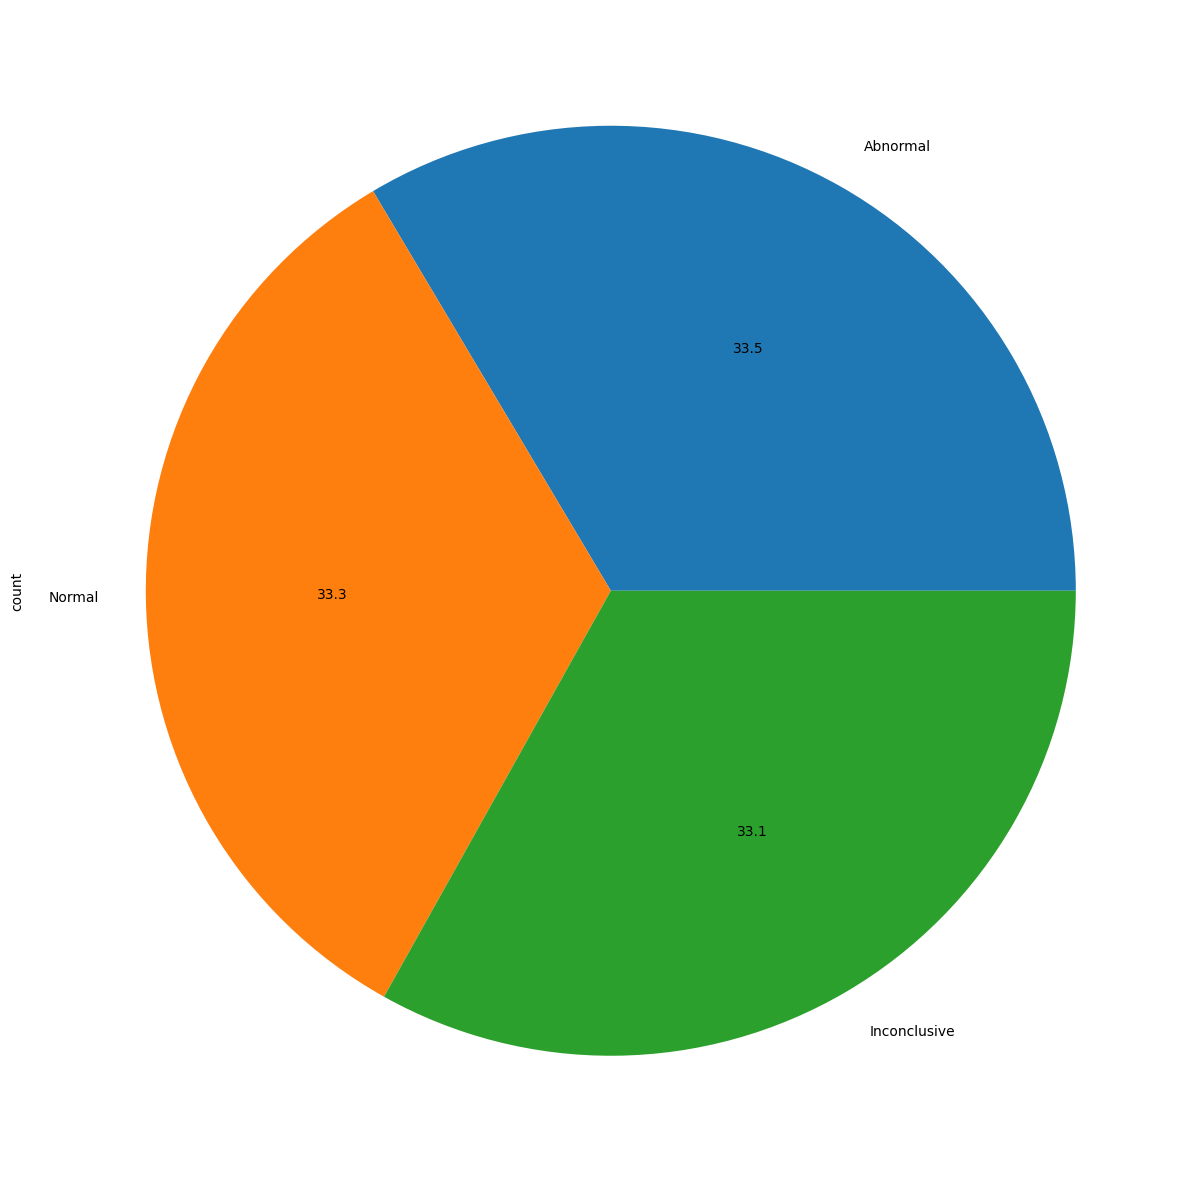

In [28]:
df['Test Results'].value_counts().plot.pie(y = df['Test Results'],figsize = (15,16), autopct = '%1.1f')

In [29]:
df_blood_type_medical_condition = pd.DataFrame(df.groupby(['Blood Type'])['Medical Condition'].value_counts())

In [30]:
df_blood_type_medical_condition

count
Blood Type Medical Condition       
A+         Diabetes            1201
           Cancer              1171
           Obesity             1170
           Asthma              1124
           Hypertension        1123
           Arthritis           1107
A-         Hypertension        1186
           Asthma              1162
           Diabetes            1154
           Arthritis           1144
           Obesity             1128
           Cancer              1124
AB+        Hypertension        1204
           Asthma              1173
           Diabetes            1165
           Arthritis           1124
           Obesity             1116
           Cancer              1100
AB-        Cancer              1186
           Arthritis           1179
           Obesity             1146
           Diabetes            1132
           Asthma              1123
           Hypertension        1108
B+         Arthritis           1191
           Cancer              1186
           Diabetes            1180
           Obesity             1137
           Asthma              1104
           Hypertension        1087
B-         Obesity             1182
           Hypertension        1163
           Arthritis           1152
           Diabetes            1136
           Cancer              1131
           Asthma              1108
O+         Arthritis           1186
           Asthma              1162
           Hypertension        1145
           Diabetes            1142
           Obesity             1122
           Cancer              1098
O-         Obesity             1145
           Cancer              1144
           Asthma              1139
           Arthritis           1135
           Hypertension        1135
           Diabetes            1106

In [31]:
pd.DataFrame(df.groupby(['Blood Type'])['Doctor'].value_counts())

count
Blood Type Doctor                     
A+         Christopher Matthews      5
           Heather Williams          5
           Christopher Baker         4
           David Williams            4
           John Rodriguez            4
...                                ...
O-         Zachary Morgan            1
           Zachary Owens             1
           Zachary Phillips          1
           Zachary Walker            1
           Zoe Knight                1

[47958 rows x 1 columns]

In [32]:
pd.DataFrame(df.groupby(['Blood Type'])['Insurance Provider'].value_counts())

count
Blood Type Insurance Provider       
A+         Cigna                1438
           Blue Cross           1393
           UnitedHealthcare     1381
           Medicare             1368
           Aetna                1316
A-         Cigna                1428
           Blue Cross           1416
           Aetna                1381
           Medicare             1349
           UnitedHealthcare     1324
AB+        UnitedHealthcare     1459
           Medicare             1402
           Cigna                1353
           Aetna                1339
           Blue Cross           1329
AB-        Cigna                1394
           UnitedHealthcare     1385
           Medicare             1380
           Blue Cross           1371
           Aetna                1344
B+         UnitedHealthcare     1439
           Cigna                1402
           Blue Cross           1362
           Aetna                1360
           Medicare             1322
B-         Medicare             1452
           Blue Cross           1377
           Aetna                1368
           Cigna                1362
           UnitedHealthcare     1313
O+         Cigna                1397
           UnitedHealthcare     1373
           Aetna                1370
           Blue Cross           1368
           Medicare             1347
O-         Medicare             1419
           Cigna                1365
           Aetna                1344
           UnitedHealthcare     1340
           Blue Cross           1336

In [33]:
pd.DataFrame(df.groupby(['Doctor'])['Medical Condition'].value_counts())

,,count
Doctor,Medical Condition,
Aaron Acevedo,Obesity,1
Aaron Adams,Cancer,1
Aaron Aguilar,Arthritis,1
Aaron Alexander,Asthma,1
Aaron Anderson,Arthritis,1
...,...,...
Zoe Khan,Diabetes,1
Zoe Knight,Asthma,1
Zoe Nichols,Asthma,1


In [34]:
pd.DataFrame(df.groupby(['Doctor'])['Insurance Provider'].value_counts())

,,count
Doctor,Insurance Provider,
Aaron Acevedo,Medicare,1
Aaron Adams,Medicare,1
Aaron Aguilar,Blue Cross,1
Aaron Alexander,Cigna,1
Aaron Anderson,Medicare,1
...,...,...
Zoe Khan,UnitedHealthcare,1
Zoe Knight,Blue Cross,1
Zoe Nichols,Medicare,1


In [35]:
pd.DataFrame(df.groupby(['Insurance Provider'])['Medical Condition'].value_counts())

count
Insurance Provider Medical Condition       
Aetna              Hypertension        1862
                   Diabetes            1831
                   Arthritis           1815
                   Cancer              1809
                   Obesity             1782
                   Asthma              1723
Blue Cross         Obesity             1872
                   Diabetes            1846
                   Arthritis           1834
                   Asthma              1816
                   Hypertension        1800
                   Cancer              1784
Cigna              Asthma              1890
                   Arthritis           1877
                   Diabetes            1875
                   Cancer              1850
                   Obesity             1847
                   Hypertension        1800
Medicare           Diabetes            1885
                   Cancer              1845
                   Obesity             1839
                   Arthritis           1835
                   Hypertension        1823
                   Asthma              1812
UnitedHealthcare   Hypertension        1866
                   Arthritis           1857
                   Asthma              1854
                   Cancer              1852
                   Obesity             1806
                   Diabetes            1779

In [36]:
pd.DataFrame(df.groupby(['Insurance Provider'])['Doctor'].value_counts())

count
Insurance Provider Doctor                     
Aetna              Michael Brown             8
                   Michael Smith             7
                   Robert Johnson            7
                   Christopher Williams      6
                   Heather Smith             6
...                                        ...
UnitedHealthcare   Zachary Young             1
                   Zachary Zuniga            1
                   Zoe Alexander             1
                   Zoe Khan                  1
                   Zoe Roberts               1

[46988 rows x 1 columns]

In [37]:
categorical_features

['Name',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [42]:
encoder.fit_transform(df['Gender'])

array([1, 1, 0, ..., 0, 1, 0])

In [44]:
df1 = pd.DataFrame()
df1['Gender'] = encoder.fit_transform(df['Gender'])

In [49]:
df1['Blood Type'] = encoder.fit_transform(df['Blood Type'])

In [50]:
df1['Medical Condition'] = encoder.fit_transform(df['Medical Condition'])

In [51]:
df1['Date of Admission'] = df['Date of Admission']

In [53]:
df1['Insurance Provider'] = encoder.fit_transform(df['Insurance Provider'])

In [55]:
df1['Admission Type'] = encoder.fit_transform(df['Admission Type'])

In [57]:
df1['Medication'] = encoder.fit_transform(df['Medication'])

In [59]:
df1['Test Results'] = encoder.fit_transform(df['Test Results'])

In [60]:
df1['Age'] = df['Age']

In [62]:
df1['Discharge Date'] = df['Discharge Date']

In [67]:
df1['Billing Amount'] = df['Billing Amount']

Let us take some useful features into a seperate data frame and give it to the model
1. Name: Not useful in predicting the target value
2. Gender: May be useful as beacuse some treatments may differ from male to female
3. Blood Type: It is a useful feature
4. Medical Condition: It is also a useful feature
5. Date of Admission: It is as important as others
6. Hospital: It is important as others
7. Insurance Provider: It is also important
8. Admission Type: It is important as others
9. Medication: It is important as others
10. Test Results: It is also important
11. Age: It has some important as others
12. Room Number: It is also not important as others
13. Discharge Date: It is also as important as others 
14. Billing Amount: It is the target one

In [78]:
df1 = df1.drop(['Date of Admission','Discharge Date'], axis = 1)

In [81]:
df1['No of Days Stayed'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [86]:
df1[df1.isna().any(axis = 1)]

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,Age,Billing Amount,No of Days Stayed
50023,0,5,0,4,2,4,1,NaN,NaN,NaN
50040,1,0,0,2,1,0,2,NaN,NaN,NaN
50055,1,5,3,0,1,3,2,NaN,NaN,NaN
50070,0,2,2,2,1,4,2,NaN,NaN,NaN
50078,1,4,0,3,0,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
54922,1,2,0,2,0,0,1,NaN,NaN,NaN
54933,0,7,1,2,2,1,1,NaN,NaN,NaN
54941,0,2,0,3,2,0,2,NaN,NaN,NaN
54955,0,5,5,1,1,0,0,NaN,NaN,NaN


In [90]:
df1 = df1.dropna()

In [92]:
X = df1.drop('Billing Amount', axis = 1)
y = df1['Billing Amount']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [94]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [96]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 616840576.0000 - mae: 20738.3145 - val_loss: 247059936.0000 - val_mae: 13200.6436
Epoch 2/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 242772992.0000 - mae: 13131.2920 - val_loss: 240286384.0000 - val_mae: 13065.7383
Epoch 3/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 236546688.0000 - mae: 12993.6729 - val_loss: 235031472.0000 - val_mae: 12961.6846
Epoch 4/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 230407008.0000 - mae: 12826.0400 - val_loss: 231223776.0000 - val_mae: 12885.6748
Epoch 5/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 229017728.0000 - mae: 12790.6035 - val_loss: 228916128.0000 - val_mae: 12834.5117
Epoch 6/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 225878752.0000 - mae: 12731.2500 - val_loss: 227903856.0000 - val_mae: 12819.5908
Epoch 7/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 228129872.0000 - mae: 12833.1680 - val_loss: 226168544.0000 - val_mae: 127

Epoch 47/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 199301152.0000 - mae: 12201.1973 - val_loss: 201203952.0000 - val_mae: 12284.1133
Epoch 48/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 200863552.0000 - mae: 12251.6602 - val_loss: 201312624.0000 - val_mae: 12286.7129
Epoch 49/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 202714880.0000 - mae: 12303.8838 - val_loss: 201116208.0000 - val_mae: 12282.3818
Epoch 50/50
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 201839440.0000 - mae: 12268.9346 - val_loss: 201070496.0000 - val_mae: 12282.0938


In [97]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

In [98]:
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

Test Loss (MSE): 201870816.0
Test MAE: 12302.54296875


In [104]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Define the K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to build the model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Store scores
mse_scores = []
mae_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a new model for each fold
    model = create_model()

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)

# Calculate and print the average scores
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Average MSE: 221924838.32288495
Average MAE: 12702.32132984012
